In [2]:
import glob
import numpy as np
import pandas as pd
from scipy.stats import truncnorm
import scipy.stats as stats
import matplotlib.pyplot as plt
import pingouin as pg

In [97]:
def read_file_base(path_dir):
    data = []
    data.append(mean_files(path_dir + '1/'))
    data.append(mean_files(path_dir + '2/'))
    data.append(mean_files(path_dir + '3/'))
    return data

def read_files(path_dir):
    print('---AVVIO LETTURA---')
    for elem in glob.glob(path_dir + "*.txt"):
        row_elem = []
        for row in open(elem, "r"):
            val = float(row.split(' ')[1])
            row_elem.append(val)
        yield row_elem
        
def mean_files(path_dir):
    arr = []
    for elem in read_files(path_dir):
        arr.append(np.mean(elem))
    return arr

def read_file(path):
    data = []
    data.append(mean_files(path + '1/'))
    data.append(mean_files(path + '2/'))
    data.append(mean_files(path + '3/'))
    return data

def write_file_arr(path, arr):
    f = open(path, "w")
    for elem in arr:
        f.write(str(elem) + '\n')

def write_file(data, name):
    df = pd.DataFrame(columns=['Carico1', 'Carico2', 'Carico3'])
    for c1, c2, c3 in zip(data[0], data[1], data[2]):
        df.loc[len(df)] = [c1, c2, c3]
    df.to_csv(path_or_buf=name, sep=',')
    
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def get_pezzotto(data):
    s = np.std(data)
    m = np.mean(data)
    low = np.min(data)
    high = np.max(data)
    
    X1 = get_truncated_normal(mean=m, sd=s, low=low, upp=high)
    pezz = np.concatenate((data, X1.rvs(50)))
    pezz = np.random.choice(pezz, 30)
    ax = pg.qqplot(pezz, dist='norm', confidence=.95)
    test = stats.shapiro(pezz)
    print(test)
    plt.show()
    return pezz

In [88]:
paolo_path = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Osservazioni_tutti/Osservazioni_paolo/'
marco_path = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Osservazioni_tutti/Osservazioni_Marco/'
vito_path = 'C:/Users/stefa/Desktop/Impianti/impianti_pratica/Nbody/Osservazioni_tutti/Osservazioni_vito_1/'

In [91]:
data_paolo_1 = read_file_base(paolo_path)
data_marco_1 = read_file_base(marco_path)
data_vito = read_file_base(vito_path)

---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---
---AVVIO LETTURA---


ShapiroResult(statistic=0.9471842646598816, pvalue=0.14204709231853485)


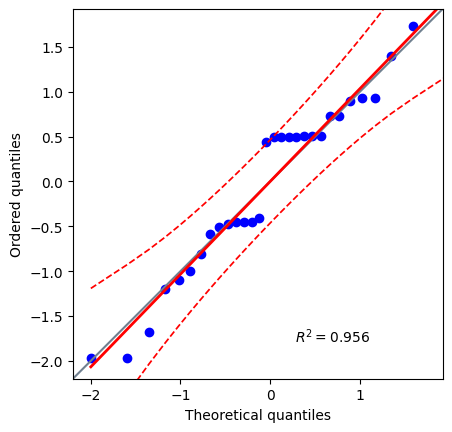

In [100]:
pez_1 = get_pezzotto(data_vito[0])

ShapiroResult(statistic=0.9636620283126831, pvalue=0.3828691244125366)


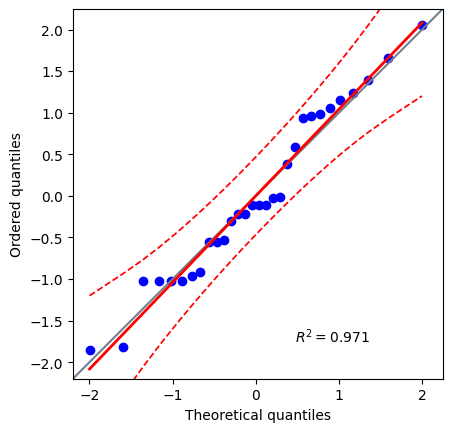

In [102]:
pezz_2 = get_pezzotto(data_vito[1])

In [103]:
write_file([pezz_1, pezz_2, data_vito[2]], 'data_vito.csv')